In [22]:
import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


# argParser = argparse.ArgumentParser()
# argParser.add_argument('--config', '-c', default='sub001.ses1.toml', type=str, help='experiment file (.json or .toml)')
# args = argParser.parse_args()
from rtCommon.cfg_loading import mkdir,cfg_loading
config="sub001.ses2.toml"
cfg = cfg_loading(config)
# cfg = cfg_loading(args.config)

sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/')
from recognition_dataAnalysisFunctions import recognition_preprocess,minimalClass,behaviorDataLoading,recognition_preprocess_2run


toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub001.ses2.toml


In [24]:
recognition_preprocess_2run(cfg,1)

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/milgram/apps/hpc.rhel7/software/miniconda/4.8.3/bin/dcm2niix': '/gpfs/milgram/apps/hpc.rhel7/software/miniconda/4.8.3/bin/dcm2niix'

In [33]:
import os
os.chdir('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
!pwd

/gpfs/milgram/pi/turk-browne/projects/rtSynth_rt


In [42]:
f"sbatch {cfg.recognition_expScripts_dir}batchRegions.sh {config}"
f"bash {cfg.recognition_expScripts_dir}runAggregate.sh {config}"

'bash /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/runAggregate.sh sub001.ses2.toml'

In [43]:
subprocess.Popen(f"bash {cfg.recognition_expScripts_dir}runAggregate.sh {config}",shell=True)

In [40]:


import os
print(f"conda env={os.environ['CONDA_DEFAULT_ENV']}") 
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
from subprocess import call
import pandas as pd
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
# from rtCommon.fileClient import FileInterface
import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud


In [48]:
file="/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub001/ses2/feedback/B_evidences_1.txt"


file1 = open(file,"r") 
# L = ["This is Delhi \n","This is Paris \n","This is London \n"]  
  
# # \n is placed to indicate EOL (End of Line) 
# file1.write("Hello \n") 
# file1.writelines(L) 
# file1.close() #to change file access modes 
  
# file1 = open("myfile.txt","r+")  
  
# print "Output of Read function is "
B_evidences=file1.read() 

array([-102.20512212, -105.61997935, -106.45450526, -106.90217216,
       -103.69243435, -105.53718212, -105.02130161, -104.00685729,
       -105.38106223, -102.58852083, -102.6446074 , -100.70006466,
       -100.74674494, -102.60470279, -100.19074851, -102.14147819,
       -100.44908581,  -99.23726599, -102.52237706,  -99.87781061,
       -103.59399856, -100.75002038, -101.85424028, -101.59335157,
       -101.68566476,  -99.82604074,  -99.8040221 ,  -99.21229547,
        -97.55050816,  -96.88522573,  -98.58042323,  -98.64415124,
        -98.43310647,  -98.54952759,  -98.20164625,  -99.31244202,
        -98.10500721,  -97.65620961, -100.08763971,  -98.76808578,
       -102.199204  ,  -99.73942494,  -99.35247044,  -97.85453015,
        -99.96334464,  -99.32265646,  -98.12500059, -100.1956139 ,
       -100.34841483,  -99.87340321,  -98.4595707 ,  -99.39058196,
       -100.5411703 ,  -98.98258986, -100.21653087, -101.74935698,
        -98.40988961,  -98.77979785,  -99.25184618, -100.35221

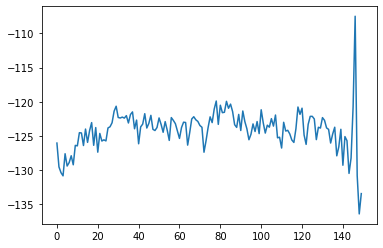

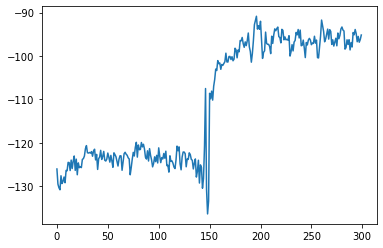

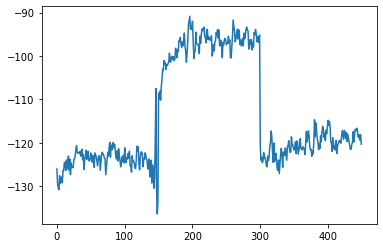

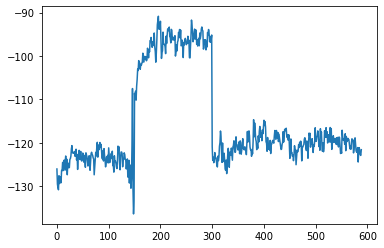

In [111]:

for run in range(1,5):
    file=f"/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub001/ses2/feedback/B_evidences_{run}.npy"
    data=np.load(file) if run==1 else np.concatenate((data,np.load(file)),axis=0)
    def gaussian(x, mu, sig):
        # mu and sig is determined before each neurofeedback session using 2 recognition runs.
        return round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (0,1) -> [1,19]


    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(data)



#     morphParams=[gaussian(B_evidence, mu, sig) for B_evidence in data]

#     plt.figure()
#     plt.plot(morphParams)

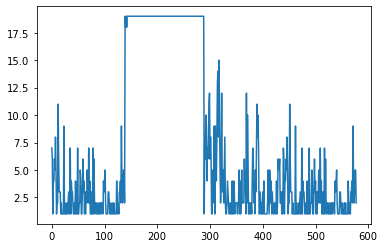

In [71]:
mu=-120
sig=-4
morphParams=[gaussian(B_evidence, mu, sig) for B_evidence in data]

plt.figure()
plt.plot(morphParams)

In [72]:
cfg

{'title': 'rtSynth_rt',
 'session': 2,
 'subjectDay': 2,
 'runNum': [1],
 'scanNum': [1],
 'subjectName': 'sub001',
 'LASTNAME': 'rtSynth_sub001',
 'subjectIDforxnat': 'rtSynth_sub001_ses2',
 'realtimeFolder_subjectName': 'rtSynth_sub001',
 'preDay_YYYYMMDD': '20210114',
 'YYYYMMDD': '20210122',
 'num_total_TRs': 174,
 'TrialNumber': 12,
 'plotTitle': 'Realtime Plot',
 'plotXLabel': 'Sample #',
 'plotYLabel': 'Value',
 'plotXRangeLow': 0,
 'plotXRangeHigh': 20,
 'plotYRangeLow': -1,
 'plotYRangeHigh': 1,
 'plotAutoRangeX': False,
 'plotAutoRangeY': True,
 'dicomNamePattern': '001_{SCAN:06d}_{TR:06d}.dcm',
 'minExpectedDicomSize': 300000,
 'projectDir': '/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/',
 'tmp_folder': '/gpfs/milgram/scratch60/turk-browne/kp578/rtcloud_rt/',
 'orderFolder': '/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/orders/',
 'subjects_dir': '/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/',
 'dicom_folder': '/gp

In [73]:
'''
purpose: 
    train offline models

steps:
    load preprocessed and aligned behavior and brain data 
    select data with the wanted pattern like AB AC AD BC BD CD 
    train correspondng classifier and save the classifier performance and the classifiers themselves.

'''

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
import nibabel as nib
import itertools
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

def gaussian(x, mu, sig):
    # mu and sig is determined before each neurofeedback session using 2 recognition runs.
    return round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (0,1) -> [1,19]

def normalize(X):
    X = X - X.mean(0)
    return X

def jitter(size,const=0):
    jit = np.random.normal(0+const, 0.05, size)
    X = np.zeros((size))
    X = X + jit
    return X

def other(target):
    other_objs = [i for i in ['bed', 'bench', 'chair', 'table'] if i not in target]
    return other_objs

def red_vox(n_vox, prop=0.1):
    return int(np.ceil(n_vox * prop))

def get_inds(X, Y, pair, testRun=None):

    inds = {}

    # return relative indices
    if testRun:
        trainIX = Y.index[(Y['label'].isin(pair)) & (Y['run_num'] != int(testRun))]
    else:
        trainIX = Y.index[(Y['label'].isin(pair))]

    # pull training and test data
    trainX = X[trainIX]
    trainY = Y.iloc[trainIX].label

    # Main classifier on 5 runs, testing on 6th
    clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                             multi_class='multinomial').fit(trainX, trainY)
    B = clf.coef_[0]  # pull betas

    # retrieve only the first object, then only the second object
    if testRun:
        obj1IX = Y.index[(Y['label'] == pair[0]) & (Y['run_num'] != int(testRun))]
        obj2IX = Y.index[(Y['label'] == pair[1]) & (Y['run_num'] != int(testRun))]
    else:
        obj1IX = Y.index[(Y['label'] == pair[0])]
        obj2IX = Y.index[(Y['label'] == pair[1])]

    # Get the average of the first object, then the second object
    obj1X = np.mean(X[obj1IX], 0)
    obj2X = np.mean(X[obj2IX], 0)

    # Build the importance map
    mult1X = obj1X * B
    mult2X = obj2X * B

    # Sort these so that they are from least to most important for a given category.
    sortmult1X = mult1X.argsort()[::-1]
    sortmult2X = mult2X.argsort()

    # add to a dictionary for later use
    inds[clf.classes_[0]] = sortmult1X
    inds[clf.classes_[1]] = sortmult2X

    return inds

if 'milgram' in os.getcwd():
    main_dir='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/'
else:
    main_dir='/Volumes/GoogleDrive/My Drive/Turk_Browne_Lab/rtcloud_kp/'

working_dir=main_dir
os.chdir(working_dir)

'''
if you read runRecording for current session and found that there are only 4 runs in the current session, 
you read the runRecording for previous session and fetch the last 4 recognition runs from previous session
'''
runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]
if len(actualRuns) < 8:
    runRecording_preDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/../runRecording.csv")
    actualRuns_preDay = list(runRecording_preDay['run'].iloc[list(np.where(1==1*(runRecording_preDay['type']=='recognition'))[0])])[-(8-len(actualRuns)):] # might be [5,6,7,8]
else: 
    actualRuns_preDay = []

assert len(actualRuns_preDay)+len(actualRuns)==8 

objects = ['bed', 'bench', 'chair', 'table']

for ii,run in enumerate(actualRuns): # load behavior and brain data for current session
    t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
    mask = nib.load(f"{cfg.chosenMask}").get_data()
    t = t[:,mask==1]
    brain_data=t if ii==0 else np.concatenate((brain_data,t), axis=0)

    t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
    behav_data=t if ii==0 else pd.concat([behav_data,t])

for ii,run in enumerate(actualRuns_preDay): # load behavior and brain data for previous session
    t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/brain_run{run}.npy")
    mask = nib.load(f"{cfg.chosenMask}").get_data()
    t = t[:,mask==1]
    brain_data = np.concatenate((brain_data,t), axis=0)

    t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/behav_run{run}.csv")
    behav_data = pd.concat([behav_data,t])


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:115: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:124: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


In [96]:
FEAT=brain_data.reshape(brain_data.shape[0],-1)
print(f"FEAT.shape={FEAT.shape}")
FEAT_mean=np.mean(FEAT,axis=1)
FEAT=(FEAT.T-FEAT_mean).T
print(f"FEAT.shape={FEAT.shape}")
META=behav_data


FEAT.shape=(380, 2482)
FEAT.shape=(380, 2482)


In [104]:
def minimalClass(cfg):
    '''
    purpose: 
        train offline models

    steps:
        load preprocessed and aligned behavior and brain data 
        select data with the wanted pattern like AB AC AD BC BD CD 
        train correspondng classifier and save the classifier performance and the classifiers themselves.

    '''

    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import sklearn
    import joblib
    import nibabel as nib
    import itertools
    from sklearn.linear_model import LogisticRegression
    from tqdm import tqdm

    def gaussian(x, mu, sig):
        # mu and sig is determined before each neurofeedback session using 2 recognition runs.
        return round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (0,1) -> [1,19]

    def normalize(X):
        X = X - X.mean(0)
        return X

    def jitter(size,const=0):
        jit = np.random.normal(0+const, 0.05, size)
        X = np.zeros((size))
        X = X + jit
        return X

    def other(target):
        other_objs = [i for i in ['bed', 'bench', 'chair', 'table'] if i not in target]
        return other_objs

    def red_vox(n_vox, prop=0.1):
        return int(np.ceil(n_vox * prop))

    def get_inds(X, Y, pair, testRun=None):
        
        inds = {}
        
        # return relative indices
        if testRun:
            trainIX = Y.index[(Y['label'].isin(pair)) & (Y['run_num'] != int(testRun))]
        else:
            trainIX = Y.index[(Y['label'].isin(pair))]

        # pull training and test data
        trainX = X[trainIX]
        trainY = Y.iloc[trainIX].label
        
        # Main classifier on 5 runs, testing on 6th
        clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                 multi_class='multinomial').fit(trainX, trainY)
        B = clf.coef_[0]  # pull betas

        # retrieve only the first object, then only the second object
        if testRun:
            obj1IX = Y.index[(Y['label'] == pair[0]) & (Y['run_num'] != int(testRun))]
            obj2IX = Y.index[(Y['label'] == pair[1]) & (Y['run_num'] != int(testRun))]
        else:
            obj1IX = Y.index[(Y['label'] == pair[0])]
            obj2IX = Y.index[(Y['label'] == pair[1])]

        # Get the average of the first object, then the second object
        obj1X = np.mean(X[obj1IX], 0)
        obj2X = np.mean(X[obj2IX], 0)

        # Build the importance map
        mult1X = obj1X * B
        mult2X = obj2X * B

        # Sort these so that they are from least to most important for a given category.
        sortmult1X = mult1X.argsort()[::-1]
        sortmult2X = mult2X.argsort()

        # add to a dictionary for later use
        inds[clf.classes_[0]] = sortmult1X
        inds[clf.classes_[1]] = sortmult2X
                 
        return inds

    if 'milgram' in os.getcwd():
        main_dir='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/'
    else:
        main_dir='/Volumes/GoogleDrive/My Drive/Turk_Browne_Lab/rtcloud_kp/'

    working_dir=main_dir
    os.chdir(working_dir)

    '''
    if you read runRecording for current session and found that there are only 4 runs in the current session, 
    you read the runRecording for previous session and fetch the last 4 recognition runs from previous session
    '''
    runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
    actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]
    if len(actualRuns) < 8:
        runRecording_preDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/../runRecording.csv")
        actualRuns_preDay = list(runRecording_preDay['run'].iloc[list(np.where(1==1*(runRecording_preDay['type']=='recognition'))[0])])[-(8-len(actualRuns)):] # might be [5,6,7,8]
    else: 
        actualRuns_preDay = []

    assert len(actualRuns_preDay)+len(actualRuns)==8 

    objects = ['bed', 'bench', 'chair', 'table']

    for ii,run in enumerate(actualRuns): # load behavior and brain data for current session
        t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
        mask = nib.load(f"{cfg.chosenMask}").get_data()
        t = t[:,mask==1]
        brain_data=t if ii==0 else np.concatenate((brain_data,t), axis=0)

        t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
        behav_data=t if ii==0 else pd.concat([behav_data,t])

    for ii,run in enumerate(actualRuns_preDay): # load behavior and brain data for previous session
        t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/brain_run{run}.npy")
        mask = nib.load(f"{cfg.chosenMask}").get_data()
        t = t[:,mask==1]
        brain_data = np.concatenate((brain_data,t), axis=0)

        t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/behav_run{run}.csv")
        behav_data = pd.concat([behav_data,t])

    FEAT=brain_data.reshape(brain_data.shape[0],-1)
    print(f"FEAT.shape={FEAT.shape}")
    FEAT_mean=np.mean(FEAT,axis=1)
    FEAT=(FEAT.T-FEAT_mean).T

    META=behav_data

    # convert item colume to label colume
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}
    label=[]
    for curr_trial in range(META.shape[0]):
        label.append(imcodeDict[META['Item'].iloc[curr_trial]])
    META['label']=label # merge the label column with the data dataframe

    # Which run to use as test data (leave as None to not have test data)
    testRun = 2 # when testing: testRun = 2 ; META['run_num'].iloc[:5]=2

    # Decide on the proportion of crescent data to use for classification
    include = 1
    accuracyContainer=[]


    allpairs = itertools.combinations(objects,2)

    # Iterate over all the possible target pairs of objects
    for pair in allpairs:
        # Find the control (remaining) objects for this pair
        altpair = other(pair)
        
        # pull sorted indices for each of the critical objects, in order of importance (low to high)
        # inds = get_inds(FEAT, META, pair, testRun=testRun)
        
        # Find the number of voxels that will be left given your inclusion parameter above
        # nvox = red_vox(FEAT.shape[1], include)
        
        for obj in pair:
            # foil = [i for i in pair if i != obj][0]
            for altobj in altpair:
                
                # establish a naming convention where it is $TARGET_$CLASSIFICATION
                # Target is the NF pair (e.g. bed/bench)
                # Classificationis is btw one of the targets, and a control (e.g. bed/chair, or bed/table, NOT bed/bench)
                naming = '{}{}_{}{}'.format(pair[0], pair[1], obj, altobj)
                
                # Pull the relevant inds from your previously established dictionary 
                # obj_inds = inds[obj]
                
                # If you're using testdata, this function will split it up. Otherwise it leaves out run as a parameter
                # if testRun:
                #     trainIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] != int(testRun))]
                #     testIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] == int(testRun))]
                # else:
                #     trainIX = META.index[(META['label'].isin([obj, altobj]))]
                #     testIX = META.index[(META['label'].isin([obj, altobj]))]
                # # pull training and test data
                # trainX = FEAT[trainIX]
                # testX = FEAT[testIX]
                # trainY = META.iloc[trainIX].label
                # testY = META.iloc[testIX].label
                
                # print(f"obj={obj},altobj={altobj}")
                # print(f"unique(trainY)={np.unique(trainY)}")
                # print(f"unique(testY)={np.unique(testY)}")
                # assert len(np.unique(trainY))==2

                if testRun:
                    trainIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']!=int(testRun))
                    testIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']==int(testRun))
                else:
                    trainIX = ((META['label']==obj) + (META['label']==altobj))
                    testIX = ((META['label']==obj) + (META['label']==altobj))
                # pull training and test data
                trainX = FEAT[trainIX]
                testX = FEAT[testIX]
                trainY = META.iloc[np.asarray(trainIX)].label
                testY = META.iloc[np.asarray(testIX)].label

                print(f"obj={obj},altobj={altobj}")
                print(f"unique(trainY)={np.unique(trainY)}")
                print(f"unique(testY)={np.unique(testY)}")
                assert len(np.unique(trainY))==2

                # # If you're selecting high-importance features, this bit handles that
                # if include < 1:
                #     trainX = trainX[:, obj_inds[-nvox:]]
                #     testX = testX[:, obj_inds[-nvox:]]
                
                # Train your classifier
                clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                         multi_class='multinomial').fit(trainX, trainY)
                
                model_folder = cfg.trainingModel_dir
                # Save it for later use
                joblib.dump(clf, model_folder +'/{}.joblib'.format(naming))
                
                # Monitor progress by printing accuracy (only useful if you're running a test set)
                acc = clf.score(testX, testY)
                print(naming, acc)
minimalClass(cfg)

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:116: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:125: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


FEAT.shape=(380, 2482)
obj=bed,altobj=chair
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

bedbench_bedchair 0.8333333333333334
obj=bed,altobj=table
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

bedbench_bedtable 0.5416666666666666
obj=bench,altobj=chair
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

bedbench_benchchair 0.625
obj=bench,altobj=table
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

bedbench_benchtable 0.7083333333333334
obj=bed,altobj=bench
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']
bedchair_bedbench 0.7916666666666666
obj=bed,altobj=table
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

bedchair_bedtable 0.5416666666666666
obj=chair,altobj=bench
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

bedchair_chairbench 0.625
obj=chair,altobj=table
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

bedchair_chairtable 0.75
obj=bed,altobj=bench
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']
bedtable_bedbench 0.7916666666666666
obj=bed,altobj=chair
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

bedtable_bedchair 0.8333333333333334
obj=table,altobj=bench
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

bedtable_tablebench 0.7083333333333334
obj=table,altobj=chair
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

bedtable_tablechair 0.75
obj=bench,altobj=bed
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']
benchchair_benchbed 0.7916666666666666
obj=bench,altobj=table
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

benchchair_benchtable 0.7083333333333334
obj=chair,altobj=bed
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']
benchchair_chairbed 0.8333333333333334
obj=chair,altobj=table
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

benchchair_chairtable 0.75
obj=bench,altobj=bed
unique(trainY)=['bed' 'bench']
unique(testY)=['bed' 'bench']
benchtable_benchbed 0.7916666666666666
obj=bench,altobj=chair
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

benchtable_benchchair 0.625
obj=table,altobj=bed
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

benchtable_tablebed 0.5416666666666666
obj=table,altobj=chair
unique(trainY)=['chair' 'table']
unique(testY)=['chair' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

benchtable_tablechair 0.75
obj=chair,altobj=bed
unique(trainY)=['bed' 'chair']
unique(testY)=['bed' 'chair']
chairtable_chairbed 0.8333333333333334
obj=chair,altobj=bench
unique(trainY)=['bench' 'chair']
unique(testY)=['bench' 'chair']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/use

chairtable_chairbench 0.625
obj=table,altobj=bed
unique(trainY)=['bed' 'table']
unique(testY)=['bed' 'table']


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/computation/expressions.py:201: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/pandas/core/com

chairtable_tablebed 0.5416666666666666
obj=table,altobj=bench
unique(trainY)=['bench' 'table']
unique(testY)=['bench' 'table']
chairtable_tablebench 0.7083333333333334


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [121]:
cfg.trainingModel_dir

'/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub001/ses2/recognition/clf/'

In [108]:
def morphingTarget(cfg):
    '''
    purpose:
        get the morphing target function
    steps:
        load train clf
        load brain data and behavior data
        get the morphing target function
            evidence_floor is C evidence for CD classifier(can also be D evidence for CD classifier)
            evidence_ceil  is A evidence in AC and AD classifier
    '''

    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import sklearn
    import joblib
    import nibabel as nib
    import itertools
    from sklearn.linear_model import LogisticRegression
    from tqdm import tqdm


    if 'milgram' in os.getcwd():
        main_dir='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/'
    else:
        main_dir='/Volumes/GoogleDrive/My Drive/Turk_Browne_Lab/rtcloud_kp/'

    working_dir=main_dir
    os.chdir(working_dir)

    runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
    actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]

    objects = ['bed', 'bench', 'chair', 'table']

    for ii,run in enumerate(actualRuns[:2]): # load behavior and brain data for current session
        t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
        mask = nib.load(f"{cfg.chosenMask}").get_data()
        t = t[:,mask==1]
        brain_data=t if ii==0 else np.concatenate((brain_data,t), axis=0)

        t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
        behav_data=t if ii==0 else pd.concat([behav_data,t])

    FEAT=brain_data.reshape(brain_data.shape[0],-1)
    FEAT_mean=np.mean(FEAT,axis=1)
    FEAT=(FEAT.T-FEAT_mean).T
    META=behav_data

    # convert item colume to label colume
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}
    label=[]
    for curr_trial in range(META.shape[0]):
        label.append(imcodeDict[META['Item'].iloc[curr_trial]])
    META['label']=label # merge the label column with the data dataframe


    def classifierEvidence(clf,X,Y): # X shape is [trials,voxelNumber], Y is ['bed', 'bed'] for example # return a 1-d array of probability
        # This function get the data X and evidence object I want to know Y, and output the trained model evidence.
        targetID=[np.where((clf.classes_==i)==True)[0][0] for i in Y]
        Evidence=(np.sum(X*clf.coef_,axis=1)+clf.intercept_) if targetID[0]==1 else (1-(np.sum(X*clf.coef_,axis=1)+clf.intercept_))
        return np.asarray(Evidence)

    A_ID = (META['label']=='bed')
    X = FEAT[A_ID]

    # evidence_floor is C evidence for AC_CD BC_CD CD_CD classifier(can also be D evidence for CD classifier)
    Y = ['table'] * X.shape[0]
    CD_clf=joblib.load(cfg.usingModel_dir +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
    CD_C_evidence = classifierEvidence(CD_clf,X,Y)
    evidence_floor = np.mean(CD_C_evidence)
    print(f"evidence_floor={evidence_floor}")

    # evidence_ceil  is A evidence in AC and AD classifier
    Y = ['bed'] * X.shape[0]
    AC_clf=joblib.load(cfg.usingModel_dir +'bedbench_bedtable.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
    AC_A_evidence = classifierEvidence(AC_clf,X,Y)
    evidence_ceil1 = AC_A_evidence

    Y = ['bed'] * X.shape[0]
    AD_clf=joblib.load(cfg.usingModel_dir +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
    AD_A_evidence = classifierEvidence(AD_clf,X,Y)
    evidence_ceil2 = AD_A_evidence

    evidence_ceil = np.mean((evidence_ceil1+evidence_ceil2)/2)
    print(f"evidence_ceil={evidence_ceil}")

    return evidence_floor, evidence_ceil
floor, ceil = morphingTarget(cfg)

mu = (ceil+floor)/2
sig = (ceil-floor)/2.3548
np.save(f"{cfg.feedback_dir}morphingTarget",[mu,sig])

evidence_floor=22.482526985348045
evidence_ceil=-23.473596052503737


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


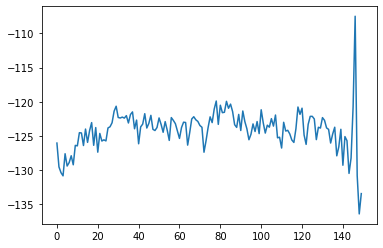

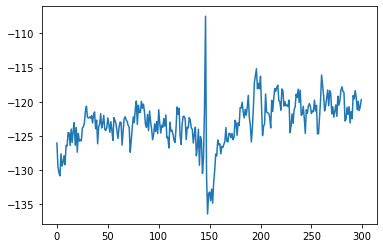

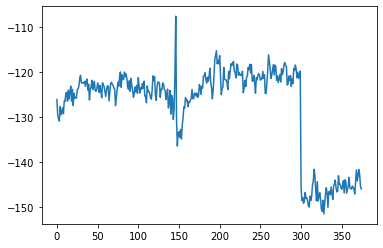

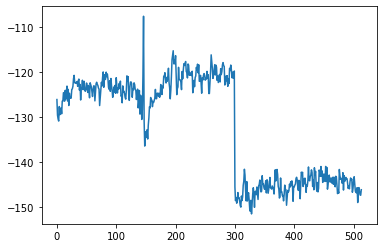

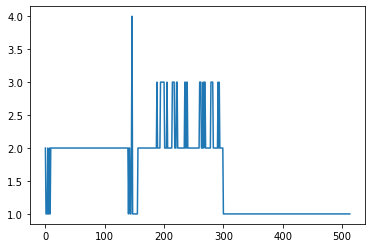

In [1]:
import numpy as np

for run in range(1,5):
    file=f"/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub001/ses2/feedback/B_evidences_{run}.npy"
    data=np.load(file) if run==1 else np.concatenate((data,np.load(file)),axis=0)
    def gaussian(x, mu, sig):
        # mu and sig is determined before each neurofeedback session using 2 recognition runs.
        return round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (0,1) -> [1,19]


    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(data)



#     morphParams=[gaussian(B_evidence, mu, sig) for B_evidence in data]

#     plt.figure()
#     plt.plot(morphParams)



mu=-140
sig=50
morphParams=[gaussian(B_evidence, mu, sig) for B_evidence in data]

plt.figure()
plt.plot(morphParams)